I found one epsilon! Mode 1: Epsilon = 0.9999999767771441
1.0
I found one epsilon! Mode 2: Epsilon = 2.999999401944479
0.9999999999999998
I found one epsilon! Mode 3: Epsilon = 4.99998953039085
1.0
I found one epsilon! Mode 4: Epsilon = 6.999883168882482
1.0
I found one epsilon! Mode 5: Epsilon = 8.999060606903189
1.0


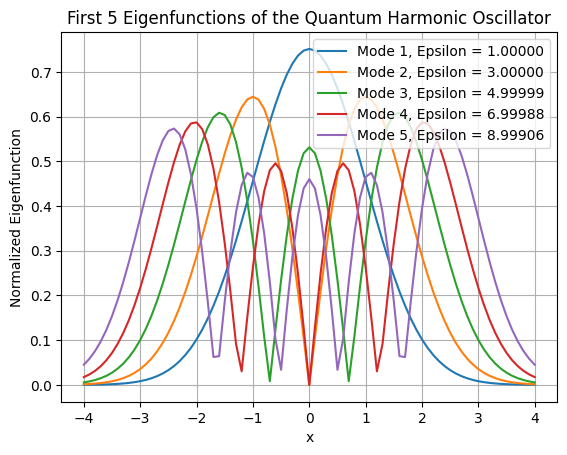

Found Eigenvalues (A2): [0.99999998 2.9999994  4.99998953 6.99988317 8.99906061]
Eigenfunctions Matrix (A1):
[[2.56183470e-04 1.45461736e-03 5.66711043e-03 1.74588473e-02
  4.50516581e-02]
 [3.76940965e-04 2.08377489e-03 7.88695716e-03 2.35399838e-02
  5.86293690e-02]
 [5.51714864e-04 2.96901781e-03 1.09156754e-02 3.15583001e-02
  7.58483958e-02]
 [8.01216066e-04 4.19588715e-03 1.49786781e-02 4.19281002e-02
  9.71899061e-02]
 [1.15311660e-03 5.87359613e-03 2.03472413e-02 5.51048286e-02
  1.23080898e-01]
 [1.64382706e-03 8.13893182e-03 2.73391696e-02 7.15653847e-02
  1.53831231e-01]
 [2.32055909e-03 1.11600069e-02 3.63163648e-02 9.17795041e-02
  1.89559851e-01]
 [3.24364379e-03 1.51394491e-02 4.76780810e-02 1.16171080e-01
  2.30113234e-01]
 [4.48904553e-03 2.03165046e-02 6.18486348e-02 1.45069151e-01
  2.74981544e-01]
 [6.15097107e-03 2.69674234e-02 7.92584568e-02 1.78649425e-01
  3.23220532e-01]
 [8.34442598e-03 3.54034079e-02 1.00317630e-01 2.16868657e-01
  3.73389569e-01]
 [1.1207519

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Define the system of ODEs: dy1/dx = y2, dy2/dx = (x^2 - epsilon) * y1
def shoot(y, x, epsilon):
    '''y[0] is the eigenfunction, y[1] is the first derivative of it'''
    return [y[1], (K * x**2 - epsilon) * y[0]]


# Define the x-domain and initial conditions
L = 4  # Boundary for x
K = 1
x_span = np.linspace(-L, L, 81)  # Grid points in x-domain  # Initial conditions: phi(-L) = 0, phi'(-L) = 1

# Create storage for eigenfunctions and eigenvalues
A1 = np.zeros((len(x_span), 5))  # Eigenfunctions matrix
A2 = np.zeros(5)  # Eigenvalues vector

# Initial guess for epsilon
epsilon_start = 0.1

# Loop over the first 5 modes
for modes in range(1, 6):
    epsilon = epsilon_start
    delta_epsilon = 0.2  # Initial step size

    # Convergence loop for each mode
    for i in range(1000):
        alpha = K * L**2 - epsilon
        A = np.sqrt(alpha)
        y0 = [1, A]

        sol = odeint(shoot, y0, x_span, args=(epsilon,))
        boundary_value = sol[-1, 0]  # Value at the boundary

        if abs(sol[-1, 1] + np.sqrt(alpha) * boundary_value) < 1e-6:  # Check convergence
            print(f"I found one epsilon! Mode {modes}: Epsilon = {epsilon}")
            A2[modes - 1] = epsilon  # Store the found eigenvalue

            # Normalize the eigenfunction
            norm = np.trapezoid(sol[:, 0] ** 2, x_span)  # Normalization factor
            A1[:, modes - 1] = abs(sol[:, 0] / np.sqrt(norm))
            check_norm = np.trapezoid(A1[:, modes - 1] ** 2, x_span)
            print(check_norm)

            # Plot the normalized eigenfunction
            plt.plot(x_span, A1[:, modes - 1],
                     label=f"Mode {modes}, Epsilon = {epsilon:.5f}")
            break  # Exit convergence loop

        # Adjust epsilon based on overshoot/undershoot behavior
        if (-1) ** (modes + 1) * (sol[-1, 1] + np.sqrt(alpha) * boundary_value) > 0:
            epsilon += delta_epsilon  # Increase epsilon
        else:
            epsilon -= delta_epsilon / 2  # Decrease epsilon
            delta_epsilon /= 2  # Reduce step size

    # Increment epsilon for the next mode
    epsilon_start = epsilon + 0.2

# Show the plot
plt.xlabel('x')
plt.ylabel('Normalized Eigenfunction')
plt.title('First 5 Eigenfunctions of the Quantum Harmonic Oscillator')
plt.legend()
plt.grid(True)
plt.show()

# Print the found eigenvalues and eigenfunctions
print("Found Eigenvalues (A2):", A2)
print("Eigenfunctions Matrix (A1):")
print(A1)
